# Argus Benchmark Analysis

This notebook analyzes the performance metrics collected from Argus benchmarking runs.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv('results/benchmark_results.csv')
print(f"Loaded {len(df)} benchmark results")
df.head()

Loaded 21 benchmark results


,workflow_file,run_number,execution_time_seconds,timestamp
0,vwbench_workflow1,1,0.641,2026-02-05_03-47-54
1,vwbench_workflow1,2,0.632,2026-02-05_03-47-56
2,vwbench_workflow1,3,0.628,2026-02-05_03-47-59
3,vwbench_workflow3,1,1.606,2026-02-05_03-48-30
4,vwbench_workflow3,2,0.630,2026-02-05_03-48-33


## 1. Summary Statistics

In [ ]:
# Overall statistics
print("Overall Statistics:")
print(df[['execution_time_seconds', 'avg_cpu_percent', 'peak_memory_mb']].describe())

# Per workflow statistics
print("\nPer-Workflow Averages:")
print(df.groupby('workflow_file')[['execution_time_seconds', 'avg_cpu_percent', 'peak_memory_mb']].mean())

## 2. Execution Time Analysis

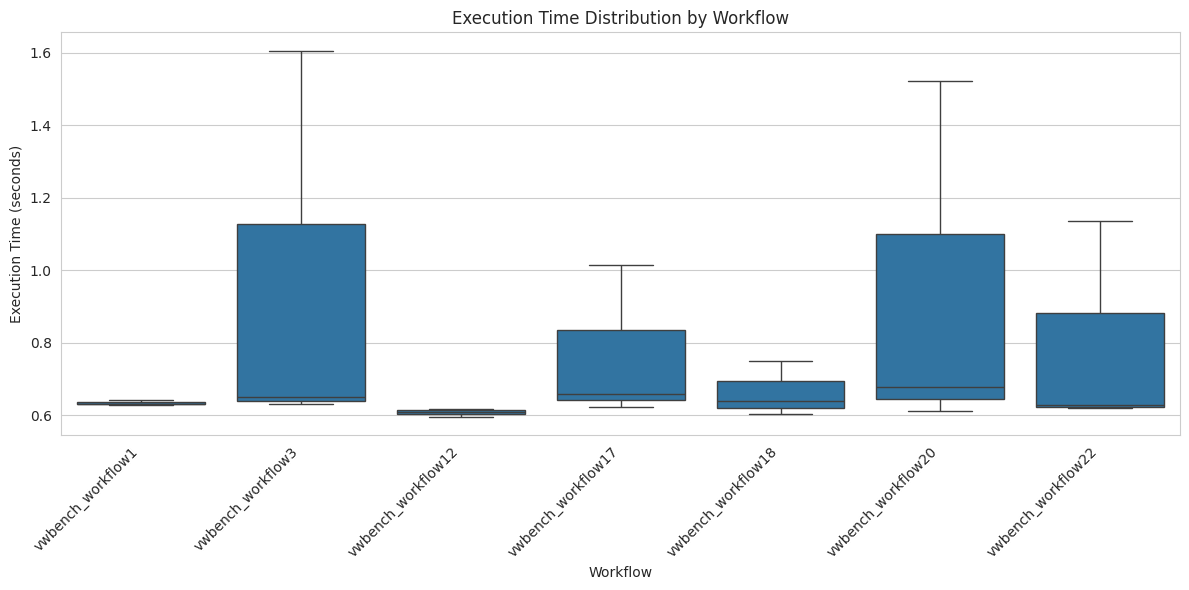


Execution Time Variance:
                        mean       std    min    max         cv
workflow_file                                                  
vwbench_workflow1   0.633667  0.006658  0.628  0.641   1.050762
vwbench_workflow12  0.607667  0.010693  0.596  0.617   1.759629
vwbench_workflow17  0.765667  0.216597  0.624  1.015  28.288703
vwbench_workflow18  0.664667  0.077022  0.603  0.751  11.588010
vwbench_workflow20  0.936667  0.507987  0.611  1.522  54.233439
vwbench_workflow22  0.794000  0.295349  0.619  1.135  37.197600
vwbench_workflow3   0.962000  0.557810  0.630  1.606  57.984408


In [10]:
# Box plot of execution times
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='workflow_file', y='execution_time_seconds')
plt.title('Execution Time Distribution by Workflow')
plt.xlabel('Workflow')
plt.ylabel('Execution Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Variance analysis
print("\nExecution Time Variance:")
variance = df.groupby('workflow_file')['execution_time_seconds'].agg(['mean', 'std', 'min', 'max'])
variance['cv'] = (variance['std'] / variance['mean']) * 100  # Coefficient of variation
print(variance)

## 3. Resource Usage Analysis

In [ ]:
# CPU and Memory usage
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# CPU usage
sns.barplot(data=df, x='workflow_file', y='avg_cpu_percent', ax=axes[0], errorbar='sd')
axes[0].set_title('Average CPU Usage by Workflow')
axes[0].set_xlabel('Workflow')
axes[0].set_ylabel('CPU Usage (%)')
axes[0].tick_params(axis='x', rotation=45)

# Memory usage
sns.barplot(data=df, x='workflow_file', y='peak_memory_mb', ax=axes[1], errorbar='sd')
axes[1].set_title('Peak Memory Usage by Workflow')
axes[1].set_xlabel('Workflow')
axes[1].set_ylabel('Memory (MB)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. Disk and Network I/O

In [ ]:
# Disk I/O
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Disk usage
disk_data = df.groupby('workflow_file')[['avg_disk_read_kb', 'avg_disk_write_kb']].mean()
disk_data.plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Disk I/O by Workflow')
axes[0].set_ylabel('KB/s')
axes[0].set_xlabel('Workflow')
axes[0].legend(['Read', 'Write'])
axes[0].tick_params(axis='x', rotation=45)

# Network usage
net_data = df.groupby('workflow_file')[['avg_net_recv_kb', 'avg_net_send_kb']].mean()
net_data.plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Network I/O by Workflow')
axes[1].set_ylabel('KB/s')
axes[1].set_xlabel('Workflow')
axes[1].legend(['Receive', 'Send'])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 5. Run-to-Run Consistency

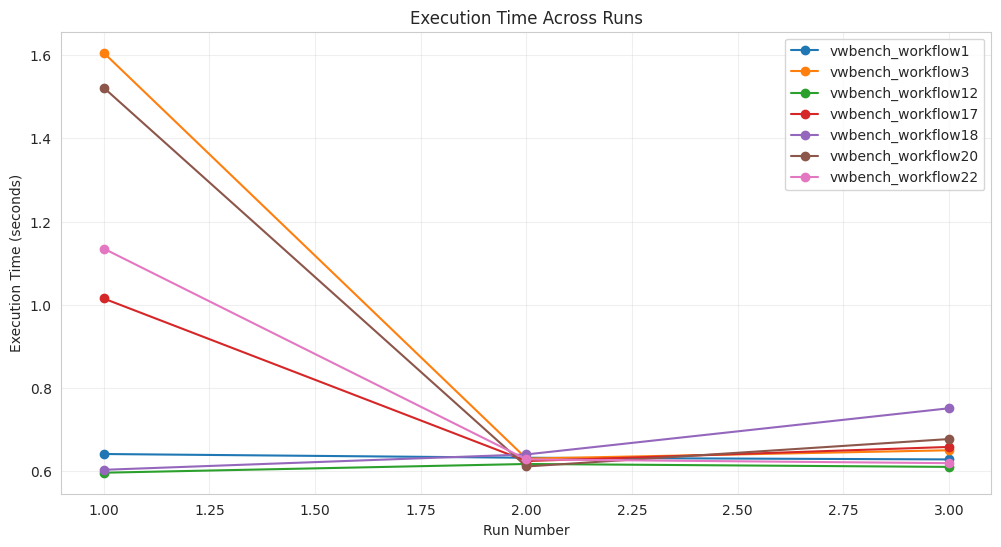

In [11]:
# Line plot showing variation across runs
plt.figure(figsize=(12, 6))
for workflow in df['workflow_file'].unique():
    workflow_data = df[df['workflow_file'] == workflow]
    plt.plot(workflow_data['run_number'], workflow_data['execution_time_seconds'], 
             marker='o', label=workflow)

plt.title('Execution Time Across Runs')
plt.xlabel('Run Number')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. Correlation Analysis

In [ ]:
# Correlation matrix
metrics = ['execution_time_seconds', 'avg_cpu_percent', 'peak_memory_mb', 
           'avg_disk_read_kb', 'avg_disk_write_kb']
correlation = df[metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Performance Metrics')
plt.tight_layout()
plt.show()

print("\nKey Correlations:")
print(correlation['execution_time_seconds'].sort_values(ascending=False))

## 7. Performance Comparison Table

In [12]:
# Create comprehensive comparison table
comparison = df.groupby('workflow_file').agg({
    'execution_time_seconds': ['mean', 'std', 'min', 'max'],
    'avg_cpu_percent': 'mean',
    'peak_memory_mb': 'max',
    'avg_disk_read_kb': 'mean',
    'avg_disk_write_kb': 'mean'
}).round(2)

print("\nPerformance Comparison:")
print(comparison)

# Export to CSV
comparison.to_csv('results/performance_summary.csv')
print("\nSummary exported to: results/performance_summary.csv")

KeyError: "Label(s) ['avg_cpu_percent', 'avg_disk_read_kb', 'avg_disk_write_kb', 'peak_memory_mb'] do not exist"

## 8. Custom Analysis

Add your own analysis below:

In [ ]:
# Your custom analysis here
